# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Aurellia Antonie]
- **Email:** [aurellia0712@gmail.com]
- **ID Dicoding:** [aurellia_antonie]

## Menentukan Pertanyaan Bisnis


- Bagaimana demografi pengguna sepeda yang kita miliki berdasarkan season?
- Apakah setiap jam dapat mempengaruhi performa jumlah pengguna sepeda?
- Bagaimana peran dari weathersit terhadap jumlah pengguna sepeda (berdasarkan pengguna casual sekaligus registered)?
- Tunjukkan performa penggunaan sepeda berdasarkan holiday, workingday, dan weekday. Bagaimana kondisi yang terlihat?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


Load data day_df

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load data hour_df

In [4]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dapat dilihat bahwa data day.csv dapat dimuat dan dibaca oleh program
- Dapat dilihat juga bahwa data hour.csv dapat dimuat dan dibaca oleh program

### Assessing Data

Menilai data day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dapat dilihat bahwa pada kolom dteday terdapat kekeliruan tipe data. Tipe data harusnya datetime bukan object

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


dapat dilihat bahwa tidak ada missing value pada data day.csv

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


dapat dilihat bahwa tidak ada data yang terduplikasi pada data day.csv

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dapat dilihat bahwa tidak ada innacurate value pada data day.csv

Menilai data hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


dapat dilihat bahwa pada kolom dteday terdapat kekeliruan tipe data. Tipe data harusnya datetime bukan object

In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


dapat dilihat bahwa tidak ada missing value pada data hour.csv

In [11]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat dilihat bahwa tidak ada data yang terduplikasi dan tidak ada innacurate value pada data hour.csv

**Insight:**
- Pada data day.csv terdapat kesalahan tipe data untuk kolom dteday. Dan tidak ada missing value, innacurate value dan data yang terduplikat pada data day.csv
- Pada data hour.csv terdapat kesalahan tipe data untuk kolom dteday, tidak ada missing value, innacurate value dan data yang terduplikat pada data hour.csv

# Cleaning data

Membersihkan data day_df

Mengganti tipe data

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan data hour_df

Mengganti tipe data

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada data day.csv dapat dilihat bahwa tipe data pada kolom dteday sudah menjadi datetime
- Pada data hour.csv dapat dilihat bahwa tipe data di kolom dteday sudah menjadi datetime
- Disini yang akan saya gunakan hanyalah data hour.csv. Alasan saya menggunakan data hour.csv karena data yang didalamnya cukup relevan dengan pertanyaan bisnis diatas. Kemudian pada data day.csv dan hour.csv yang membedakan hanyalah kolom hour nya saja.

## Exploratory Data Analysis (EDA)

Eksplorasi data hour_df

In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


dari data diatas dapat dilihat bahwa selama 17379 jam, kostumer sering melakukan bike-sharing rental pada cuaca 2 dengan mean 2.501640 dan standar daviasi sebesar 1.106918. Dan kegiatan bike-sharing rental sering dilakukan pada jam 11-12 siang dengan mean 11.546752 dan standar deviasi sebesar 6.914405 Dari informasi tersebut dapat memberikan gambaran bahwa segmentasi bike-sharing rental selama 17379 jam lebih banyak dilakukan pada siang hari.

Kelompokkan penyewa sepeda cnt (baik casual dan registered) berdasarkan season



In [17]:
hour_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual  registered  cnt                
             mean        mean  max min        mean
season                                            
1       14.290901   96.823668  801   1  111.114569
2       46.160581  162.183488  957   1  208.344069
3       50.287144  185.729093  977   1  236.016237
4       30.666824  168.202032  967   1  198.868856

Dari data diatas dapat diketahui bahwa rata-rata pengguna casual lebih suka menyewa sepeda pada season fall, sedangkan pengguna registered lebih menyukai pada season winter, dan pengguna casual sekaligus registered lebih suka menyewa pada season fall

Kelompokkan penyewa sepeda cnt (baik casual dan registered) berdasarkan weathersit

In [18]:
hour_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                
            max min        mean
weathersit                     
1           977   1  204.869272
2           957   1  175.165493
3           891   1  111.579281
4           164  23   74.333333

Dari data diatas dapat diketahui bahwa pengguna sepeda rata-rata lebih suka menyewa sepeda pada cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy). Dan yang paling sedikit pada cuaca 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan

In [19]:
day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean']
})


cnt                   
       max   min         mean
mnth                         
1     4521   431  2176.338710
2     5062  1005  2655.298246
3     8362   605  3692.258065
4     7460   795  4484.900000
5     8294  2633  5349.774194
6     8120  3767  5772.366667
7     8173  3285  5563.677419
8     7865  1115  5664.419355
9     8714  1842  5766.516667
10    8156    22  5199.225806
11    6852  1495  4247.183333
12    6606   441  3403.806452

Dari data diatas dapat diketahui bahwa jumlah pengguna sepeda tertinggi rata-rata pada bulan ke-6 (Juni) dan terendah pada bulan ke-1 (Januari)

Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday

In [20]:
hour_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt               
         max min       mean
holiday                    
0        977   1  190.42858
1        712   1  156.87000

Dari data diatas diketahui bahwa rata-rata pengguna lebih sering menyewa sepeda pada hari-hari biasa daripada hari-hari libur.

Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan workingday

In [21]:
hour_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                
            max min        mean
workingday                     
0           783   1  181.405332
1           977   1  193.207754

Dari data diatas dapat diketahui bahwa rata-rata pengguna lebih sering menyewa sepeda pada bukan hari libur atau workingday.

Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan weekday

In [22]:
hour_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                
         max min        mean
weekday                     
0        776   1  177.468825
1        968   1  183.744655
2        970   1  191.238891
3        977   1  191.130505
4        976   1  196.436665
5        957   1  196.135907
6        783   1  190.209793

dari data diatas dapat dilihat bahwa rata-rata pengguna lebih sering menyewa sepeda pada hari kamis dan jumat. Dan yang terendah pada hari minggu.

Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan hr (jam)

In [23]:
hour_df.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                
    max min        mean
hr                     
0   283   2   53.898072
1   168   1   33.375691
2   132   1   22.869930
3    79   1   11.727403
4    28   1    6.352941
5    66   1   19.889819
6   213   1   76.044138
7   596   1  212.064649
8   839   5  359.011004
9   426  14  219.309491
10  539   8  173.668501
11  663  10  208.143054
12  776   3  253.315934
13  760  11  253.661180
14  750  12  240.949246
15  750   7  251.233196
16  783  11  311.983562
17  976  15  461.452055
18  977  23  425.510989
19  743  11  311.523352
20  567  11  226.030220
21  584   6  172.314560
22  502   9  131.335165
23  256   2   87.831044

Dari data diatas dapat diketahui bahwa rata-rata pengguna menyewa sepeda tertinggi pada jam 17.00 atau jam 5 sore. Dan penyewa terendah pada jam 4 pagi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi pengguna sepeda yang kita miliki berdasarkan season?

<ipython-input-28-6affff881fb1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-28-6affff881fb1>:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/

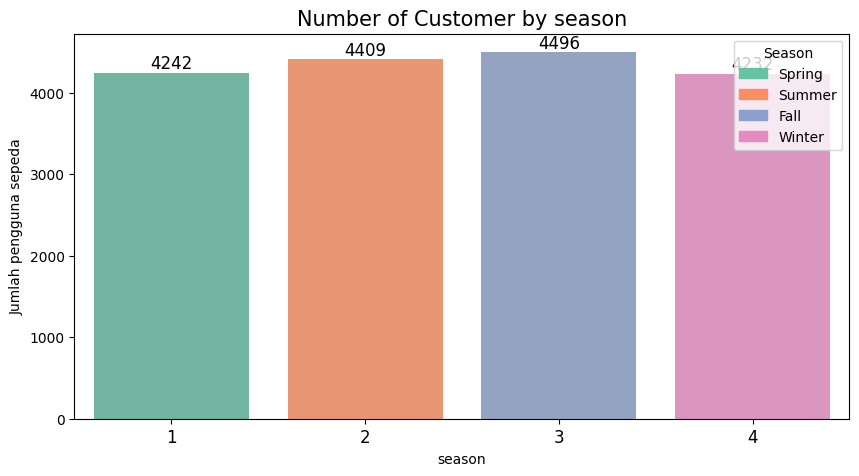

In [28]:
colors = sns.color_palette("Set2")
byseason_df = hour_df.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    y="customer_count",
    x="season",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Koordinat x (tengah kolom)
        p.get_height() + 1,  # Koordinat y (di atas kolom)
        f'{int(p.get_height())}',  # Nilai yang akan ditampilkan
        ha='center',  # Horizontal alignment (center)
        va='bottom',  # Vertical alignment (bottom)
        fontsize=12  # Ukuran font
    )
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors[:4]]
labels = ['Spring', 'Summer', 'Fall', 'Winter']
plt.legend(handles=handles, labels=labels, title="Season", loc="upper right")

plt.title("Number of Customer by season", loc="center", fontsize=15)
plt.ylabel('Jumlah pengguna sepeda')
plt.xlabel('season')
plt.tick_params(axis='x', labelsize=12)
plt.show()

Demografi pengguna yang kita miliki paling banyak pada kolom season terjadi pada season 3 yaitu pada musim gugur. dan pengguna terendah pada season 4 yaitu pada musim salju

### Pertanyaan 2: Apakah setiap jam dapat mempengaruhi performa jumlah pengguna sepeda?

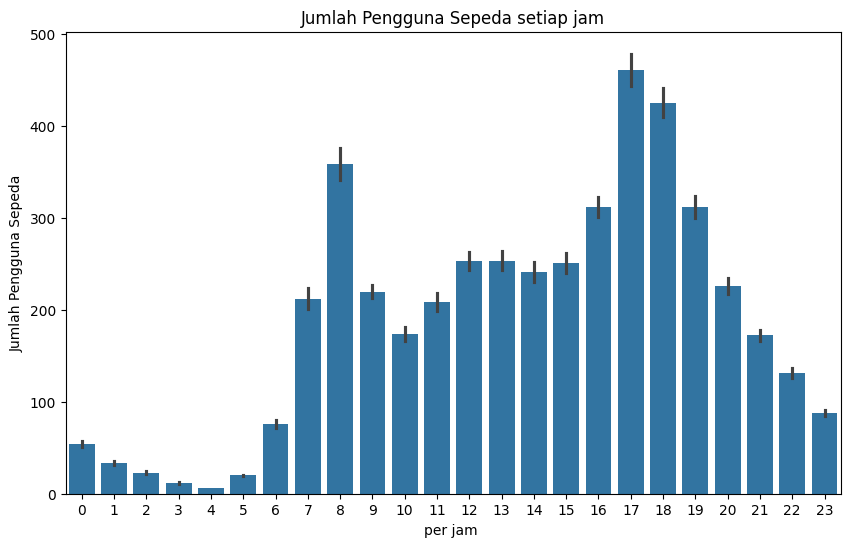

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='hr',
    y='cnt',
    data=hour_df
)

plt.title('Jumlah Pengguna Sepeda setiap jam')
plt.xlabel('per jam ')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Dari plot diatas dapat diketahui bahwa setiap jam ternyata mempengaruhi jumlah pengguna penyewa sepeda. Dimana pada jam 4 pagi merupakan titik terendah dari jumlah penyewa sepeda, Sedangkan yang tertinggi pada jam 17 atau jam 5 sore.

# Pertanyaan 3 : Bagaimana peran dari weathersit terhadap jumlah pengguna sepeda (berdasarkan pengguna casual sekaligus registered)?

<ipython-input-137-535174b37e13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-137-535174b37e13>:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

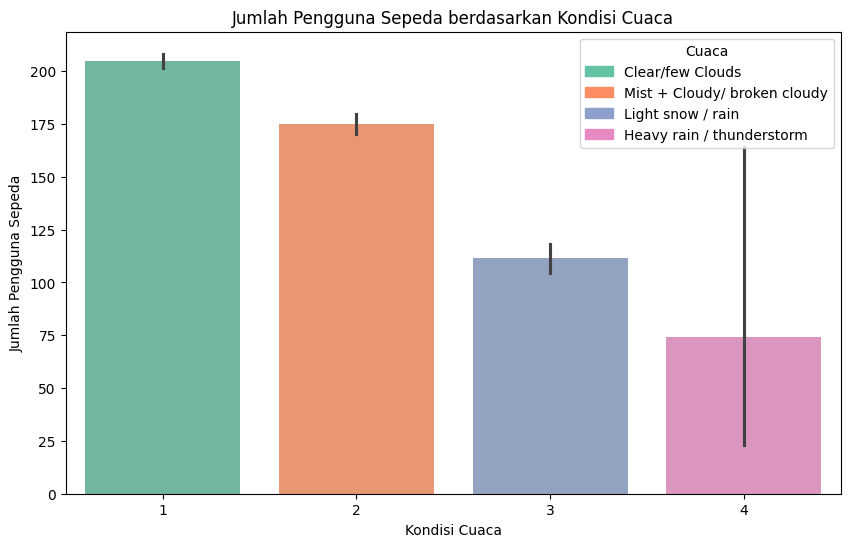

In [137]:
colors = sns.color_palette("Set2")
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=hour_df,
    palette = colors
)

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors[:4]]
labels = ['Clear/few Clouds', 'Mist + Cloudy/ broken cloudy', 'Light snow / rain', 'Heavy rain / thunderstorm']
plt.legend(handles=handles, labels=labels, title="Cuaca", loc="upper right")

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Dari plot diatas dapat disimpulkan bahwa weathersit cukup berperan penting dalam mempengaruhi performa jumlah pengguna sepeda. Penyewa sepeda terbanyak rata-rata ada pada cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy). Dan rata-rata penyewa sepeda terendah pada cuaca 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

# Pertanyaan 4 : Tunjukkan performa penggunaan sepeda berdasarkan holiday, workingday, dan weekday. Bagaimana kondisi yang terlihat?

<ipython-input-139-d95113dad858>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-139-d95113dad858>:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-

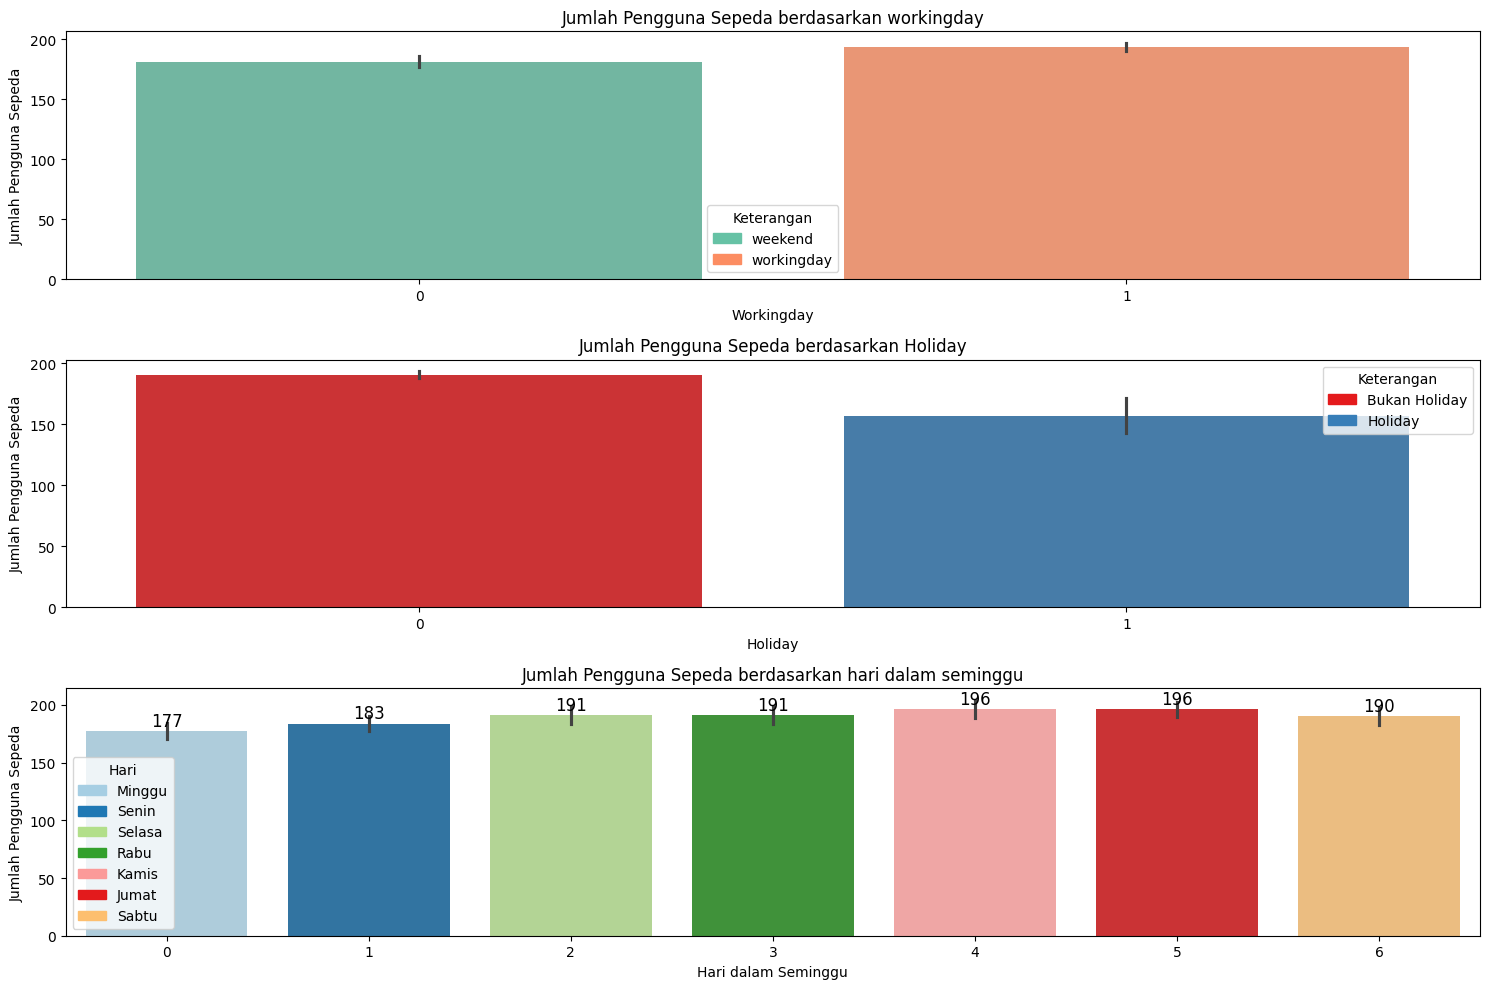

In [139]:
colors1 = sns.color_palette("Set2")
colors2 = sns.color_palette("Set1")
colors3 = sns.color_palette("Paired")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

sns.barplot(
    x='workingday',
    y='cnt',
    data=hour_df,
    palette=colors1,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan workingday')
axes[0].set_xlabel('Workingday')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

handles1 = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors1[:2]]
labels1 = ['weekend', 'workingday']
axes[0].legend(handles=handles1, labels=labels1, title='Keterangan')

sns.barplot(
  x='holiday',
  y='cnt',
  data=hour_df,
  palette=colors2,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

handles2 = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors2[:2]]
labels2 = ['Bukan Holiday', 'Holiday']
axes[1].legend(handles=handles2, labels=labels2, title='Keterangan')

ax = sns.barplot(
  x='weekday',
  y='cnt',
  data=hour_df,
  palette=colors3,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan hari dalam seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Koordinat x (tengah kolom)
        p.get_height() + 1,  # Koordinat y (di atas kolom)
        f'{int(p.get_height())}',  # Nilai yang akan ditampilkan
        ha='center',  # Horizontal alignment (center)
        va='bottom',  # Vertical alignment (bottom)
        fontsize=12  # Ukuran font
    )

handles3 = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors3[:7]]
labels3 = ['Minggu','Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
axes[2].legend(handles=handles3, labels=labels3, title='Hari')

plt.tight_layout()
plt.show()

Berdasarkan plot data diatas, diperoleh pernyataan sebagai berikut:

- Pada plot workingday, jumlah penyewa sepeda lebih banyak pada hari kerja (yakni senin - jumat) dibandingkan akhir pekan (yakni sabtu dan minggu).
- Pada plot holiday, jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan holiday) dibandingkan hari libur (holiday).
- Pada plot weekday, rata-rata jumlah penyewa sepeda tertinggi jatuh pada hari kamis dan Jumat, dan hari Minggu rata-rata dengan jumlah penyewa sepeda yang paling sedikit.

## Conclusion

- **Conclution pertanyaan 1**:
Berdasarkan hasil visualisasi data, dapat disimpulkan bahwa demografi pengguna yang kita miliki tersebar cukup merata walaupun berbeda-beda musim dengan jumlah pengguna diatas 4000 pada keempat musim. Tetapi, musim paling banyak jumlah penyewa sepeda jatuh kepada musim gugur dengan jumlah penyewa sebesar 4496. Dan jumlah penyewa sepeda terendah ditempati pada musim salju dengan jumlah penyewa sebesar 4232.
  
- **Conclution pertanyaan 2** :
Berdasarkan hasil dari visualisasi data tersebut, diketahui bahwa untuk setiap jam ternyata dapat mempengaruhi performa jumlah pengguna penyewa sepeda. Dimana jumlah penyewa sepeda terbanyak ditempati pada jam 17 atau jam 5 sore dengan rata-rata 461, sedangkan jumlah penyewa sepeda terendah jatuh pada jam 4 pagi dengan rata-rata penyewa sebesar 6.

- **Conclution pertanyaan 3** :
Berdasarkan hasil dari data tersebut, dapat disimpulkan bahwa perubahan weathersit berperan penting dalam mempengaruhi performa jumlah pengguna penyewa sepeda. Posisi pertama dalam penyewa sepeda terbanyak jatuh kepada cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) dengan rata-rata sebesar 204. Dan pada posisi terakhir, dengan rata-rata jumlah penyewa sepeda terendah pada cuaca 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) dengan rata-rata sebesar 74.

- **Conclution pertanyaan 4** :
Berdasarkan hasil dari visualisasi data tersebut, dapat diperoleh kesimpulan bahwa untuk jumlah pengguna sepeda berdasarkan workingday, hari kerja lebih unggul dibanding bukan hari kerja dengan perbedaan yang tidak jauh berbeda. Untuk hari kerja sebesar 193 dan untuk bukan hari kerja sebesar 181. Kemudian berdasarkan holiday (hari libur), dapat diketahui bahwa penyewa sepeda tertinggi rata-rata pada hari bukan holiday dibandingkan dengan holiday. Perbedaanya cukup terlihat jauh disini, yaitu untuk bukan holiday rata-rata nya sebesar 190 sedangkan holiday sebesar 156. Terakhir berdasarkan weekday, dari visualisasi data diatas Hari kamis dan Jumat menempati posisi yang sama dan urutan pertama dengan rata-rata 196 dan hari dengan jumlah penyewa terkecil ditempati oleh hari minggu dengan rata-rata 177.

